In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [10]:
df=pd.read_csv(r'C:\New folder/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.shape

(891, 12)

In [12]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
df.tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# observation
As we can see that there are highest null values in the 1 column that is cabin and 2nd highest value in the age column and 
in embarked there are only 2 null value and also we can see that there are no white space present in the datab

<AxesSubplot:>

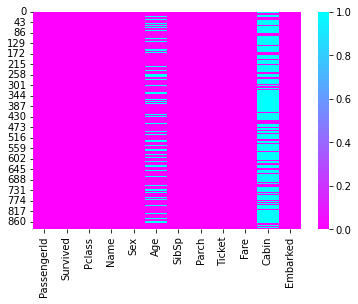

In [8]:
sns.heatmap(df.isnull(),cmap = 'cool_r')

In [9]:
df.duplicated().sum()

0

In [10]:
missing_value=df.isnull().sum().sort_values(ascending=True)
missing_value_percentage=(missing_value/len(df))*100
print(pd.concat([missing_value,missing_value_percentage],axis=1,keys=['missing values','%missing values']))

             missing values  %missing values
PassengerId               0         0.000000
Survived                  0         0.000000
Pclass                    0         0.000000
Name                      0         0.000000
Sex                       0         0.000000
SibSp                     0         0.000000
Parch                     0         0.000000
Ticket                    0         0.000000
Fare                      0         0.000000
Embarked                  2         0.224467
Age                     177        19.865320
Cabin                   687        77.104377


# observation
from the above code it is clear that cabin has 77% of the missing value in the data set and 
age has only 19% has the null value and 
we can clearly state that cabin is not contributed in the model building and 
will affect the model or model will be biased so we need to drop the column cabin and 
passenger id also because extra feature will also affect the model building

In [14]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [15]:
df.drop(columns=['PassengerId'],axis=1,inplace=True)

In [16]:
df.drop(columns=['Ticket'],axis=1,inplace=True)

In [14]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [15]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [17]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare'] 

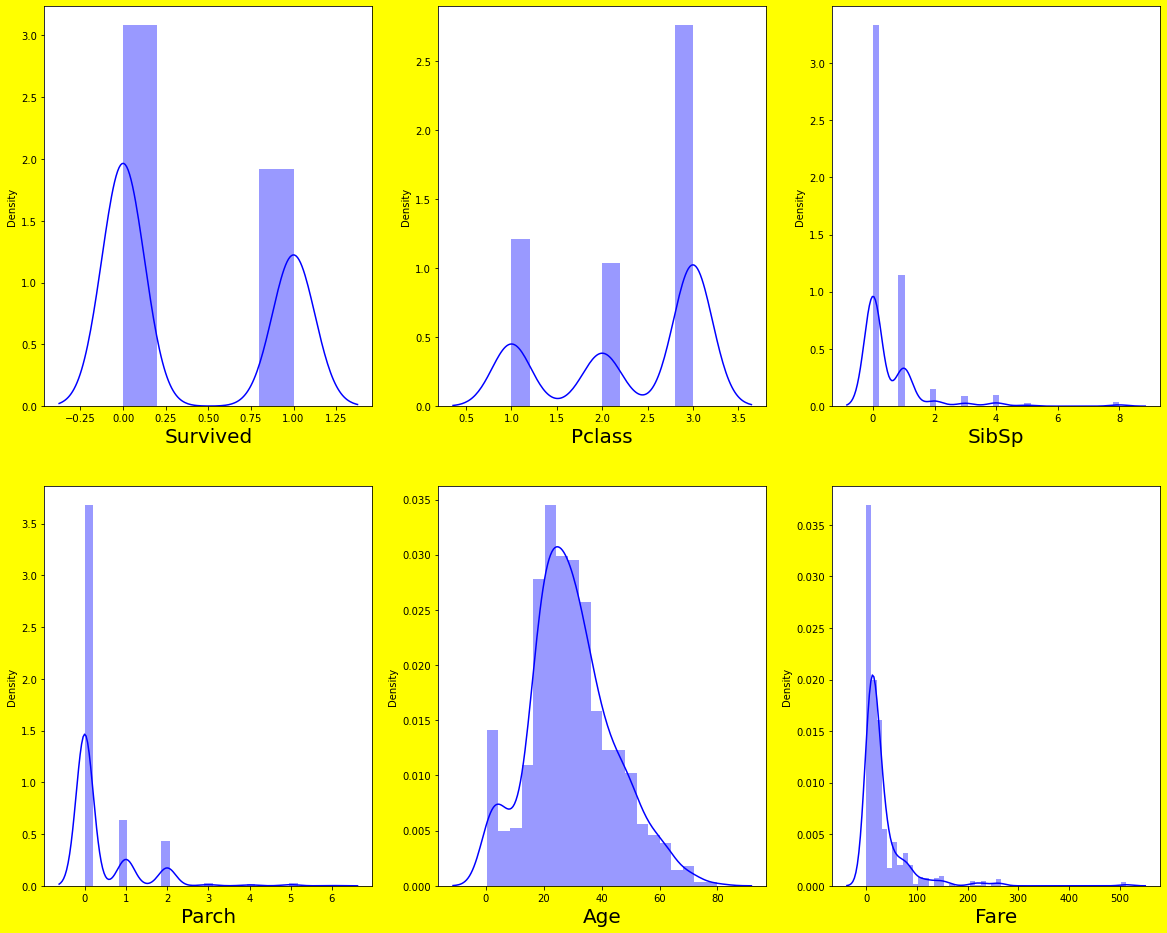

In [18]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i],color='blue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# observation
in the above code we can clearly say that there are nan value in the age group and 
we need to fill that nan and also in fare there are outliers present in the fare column so we need to fill those nan 
and outliers

# lets move towards the eda

In [19]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

# observation
"Survived" - Target / Label column has 2 categories / classes.

"sex" - Feature column has 2 categories / classes.

"Pclass" - Feature column has 2 categories / classes.

"Embarked" - Feature column has 3 categories / classes.

"SibSp" - Feature column has 7 discrete values.

"Parch" - Feature column has 7 discrete values.

In [20]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

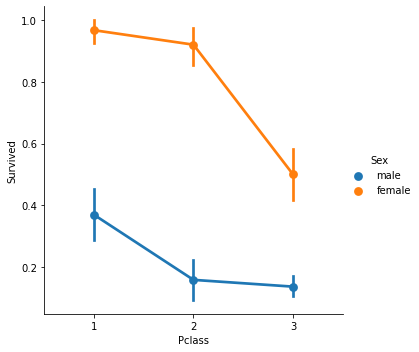

In [21]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

# observation
in the above factorplot its clearly state that 1st class female give the utmost priority to save the most of the female that is 
around 95-96% and 2nd class is around 80-85% and third class 50-55% and 
as compared to male the first class is aound 38-39% which is very less 
as compared to female now lets fill nan in age column

In [19]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [20]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# now lets check for outliers in numerical column

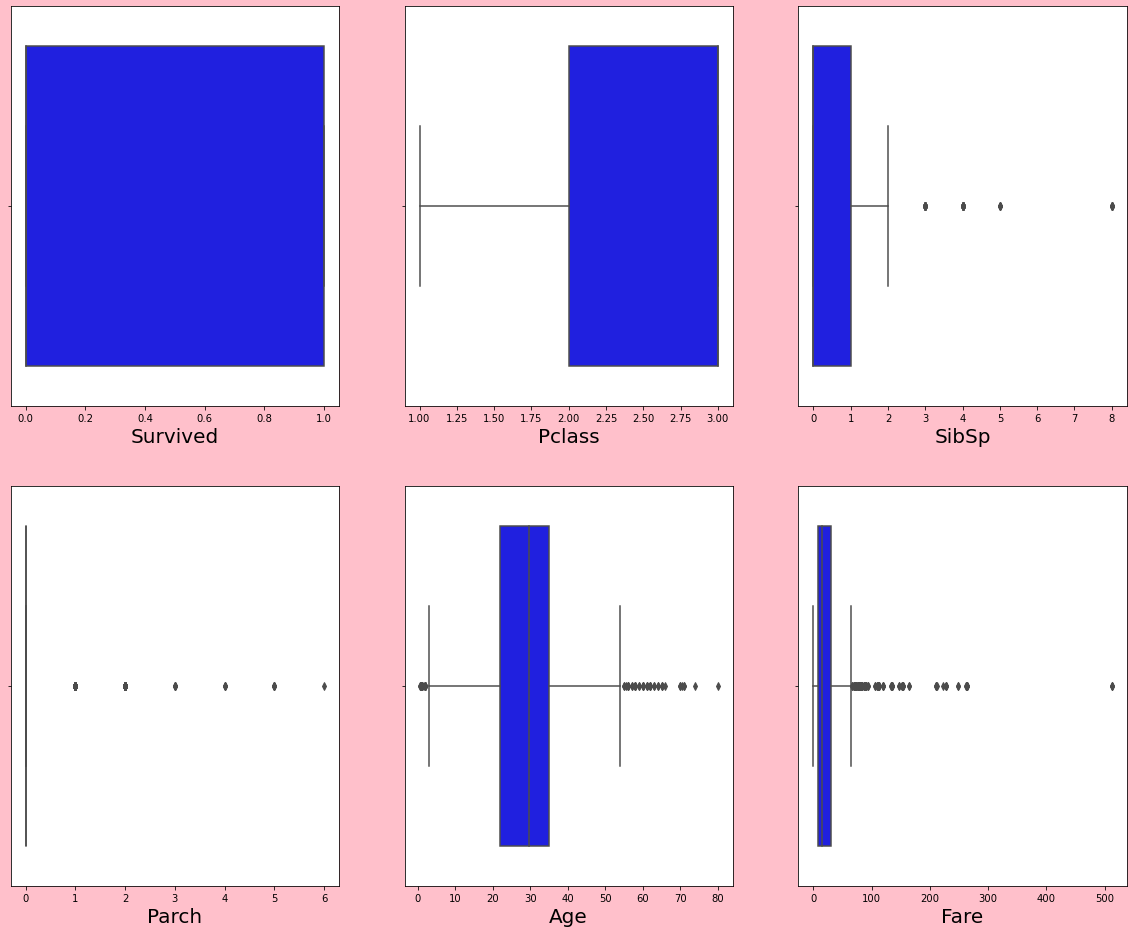

In [22]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='blue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

# observation
in the above grph clearly state that there are outliers present in age and fare that is in continous data so we need to
remove that outlier through outlier detection formula

In [23]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [24]:
f=(q3.Fare + (1.5 * iqr.Fare))
f

65.6344

In [25]:
F=np.where(df['Fare']>f)
F

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
       dtype=int64),)

In [26]:
df=df.drop(df.index[F])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [27]:
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
2,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
3,4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
4,5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
770,886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
771,887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
772,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
773,889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [28]:
a=(q3.Age + (1.5 * iqr.Age))
a

54.5

In [29]:
A=np.where(df['Age']>a)
A

(array([ 10,  14,  30,  49,  85,  87, 106, 137, 154, 158, 209, 228, 249,
        282, 393, 404, 420, 422, 427, 428, 471, 480, 493, 543, 544, 547,
        562, 583, 593, 602, 668, 738], dtype=int64),)

In [30]:
df=df.drop(df.index[A])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [31]:
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
2,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
3,4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
4,5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
738,886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
739,887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
740,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
741,889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


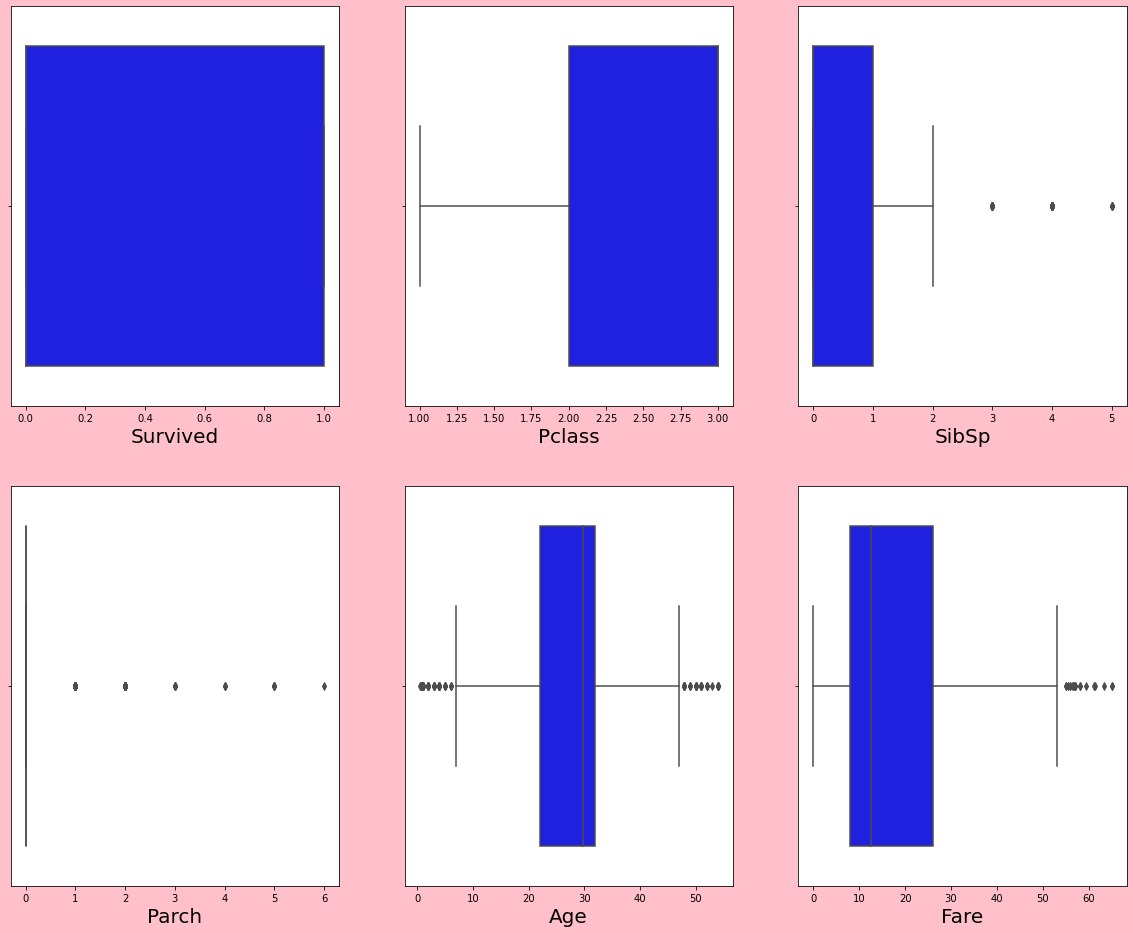

In [35]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='blue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [32]:
ch=(q1.Age-(1.5*iqr.Age))
ch

2.5

In [33]:
CH=np.where(df['Age']<ch)
CH

(array([  6,  13,  66, 101, 140, 147, 156, 176, 278, 312, 316, 390, 400,
        439, 532, 534, 624, 652, 664, 684, 687, 690], dtype=int64),)

In [34]:
df=df.drop(df.index[CH])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [35]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.337032,2.509015,28.476085,0.414702,0.323162,17.389845
std,0.473024,0.717046,10.043466,0.853916,0.788549,13.563036
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,12.275000
75%,1.000000,3.000000,33.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,65.000000


In [36]:
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
2,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
3,4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
4,5,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
716,886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
717,887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
718,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
719,889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


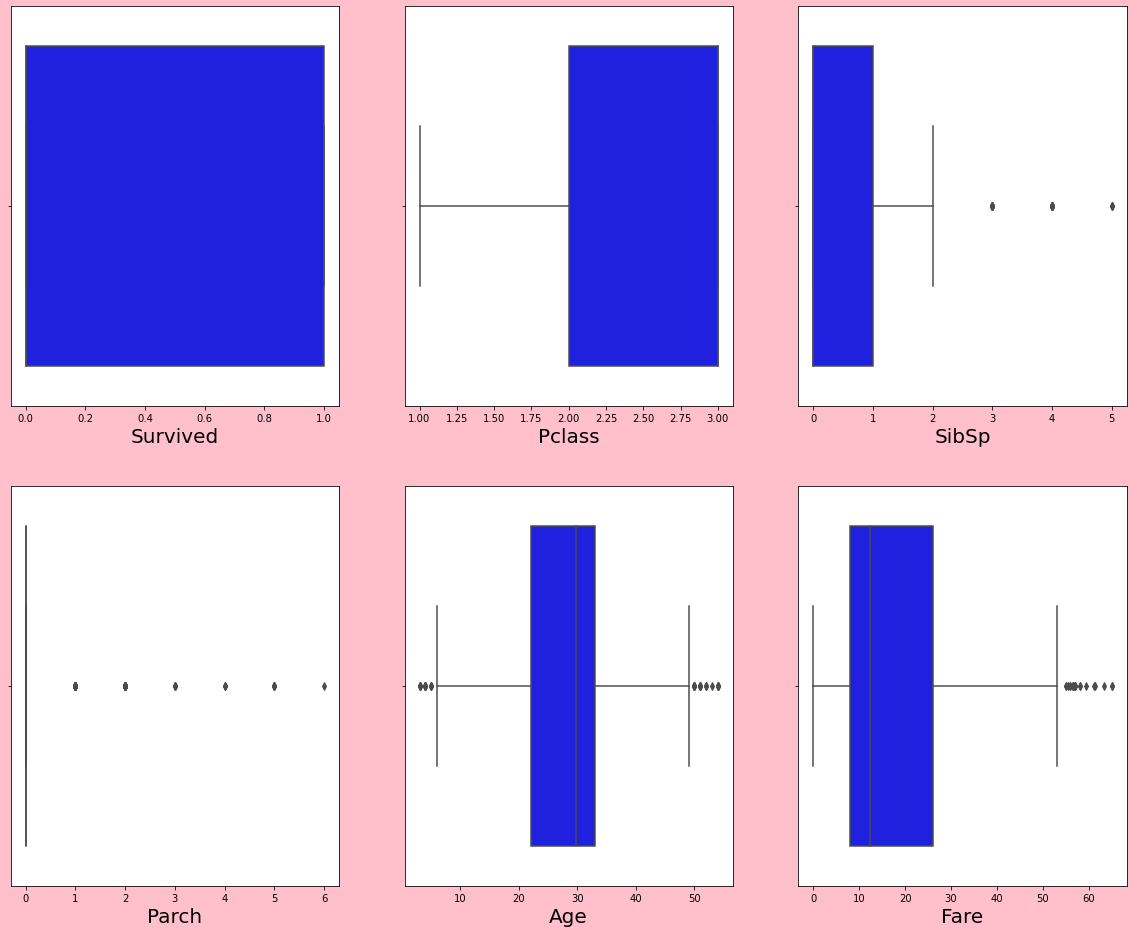

In [41]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='blue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

# now we will fill nan value in the embarked column using mode and drop the name column because its of no use

In [37]:
df.drop(columns=['Name'],axis=1,inplace=True)

In [38]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [39]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [46]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

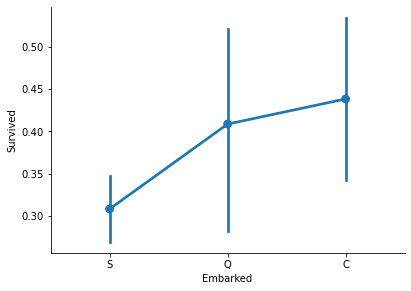

In [47]:
sns.factorplot('Embarked','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

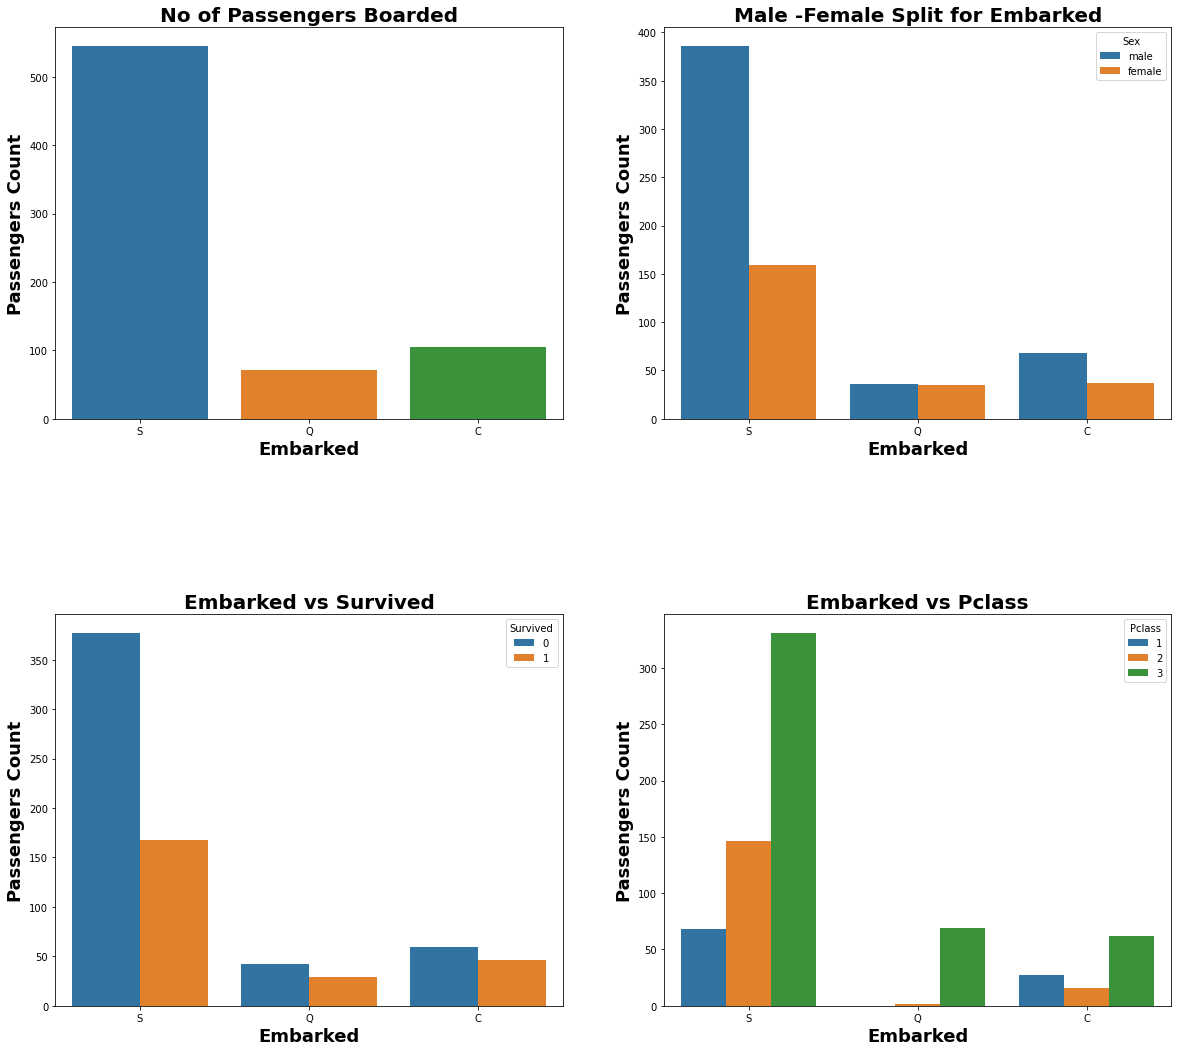

In [48]:
f,ax=plt.subplots(2,2,figsize=(20,18))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No of Passengers Boarded',fontsize= 20, fontweight='bold')
ax[0,0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0,0].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male -Female Split for Embarked',fontsize= 20, fontweight='bold')
ax[0,1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0,1].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue="Survived" ,data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived',fontsize= 20, fontweight='bold')
ax[1,0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1,0].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass',fontsize= 20, fontweight='bold')
ax[1,1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1,1].set_xlabel('Embarked', fontsize= 18, fontweight='bold')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [40]:
Categorical_features = ['Sex', 'Embarked']

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1


# now outliers were removed and categorical feature convert into numerical data lets do some more analysis

In [51]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.273088,-0.510246,-0.065202,0.004221,0.079950,0.260557,-0.106064
Pclass,-0.273088,1.000000,0.048046,-0.293610,0.081216,0.064847,-0.593781,0.010733
Sex,-0.510246,0.048046,1.000000,0.095276,-0.157456,-0.295532,-0.164606,0.077520
Age,-0.065202,-0.293610,0.095276,1.000000,-0.291564,-0.134218,0.092716,0.034725
SibSp,0.004221,0.081216,-0.157456,-0.291564,1.000000,0.392674,0.370951,0.054815
Parch,0.079950,0.064847,-0.295532,-0.134218,0.392674,1.000000,0.335415,0.026154
Fare,0.260557,-0.593781,-0.164606,0.092716,0.370951,0.335415,1.000000,-0.032364
Embarked,-0.106064,0.010733,0.077520,0.034725,0.054815,0.026154,-0.032364,1.000000


<AxesSubplot:>

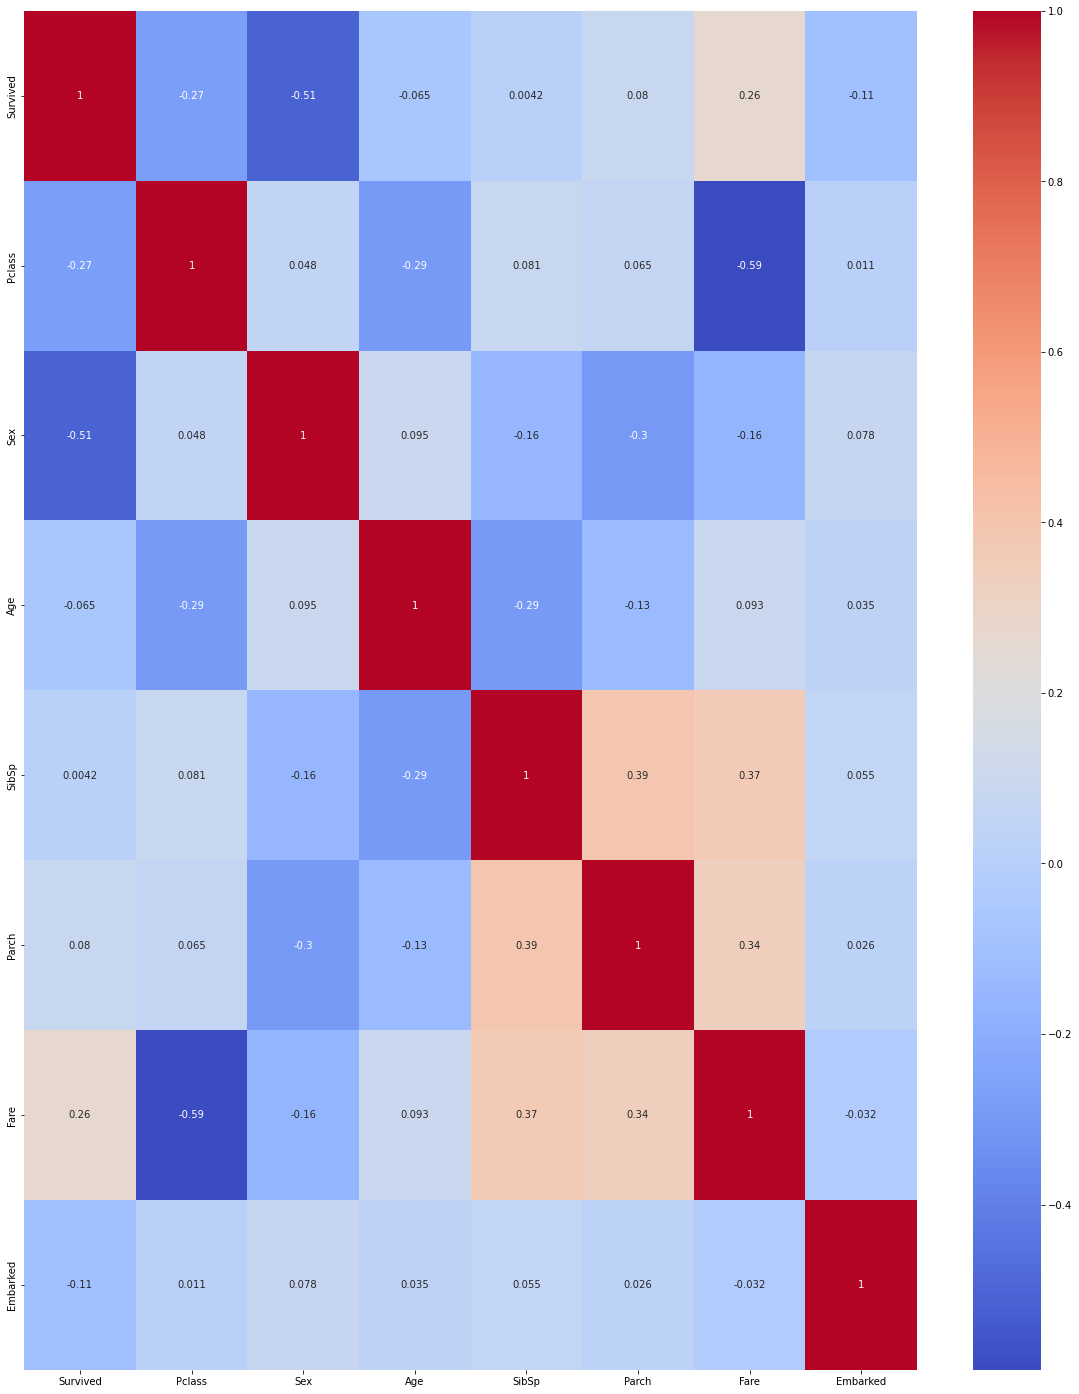

In [52]:
df=df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(df,annot=True,cmap='coolwarm')

In [42]:
X = df.drop(['Survived'], axis =1)
Y = df['Survived']

In [43]:
X.shape

(721, 7)

In [44]:
Y.shape

(721,)

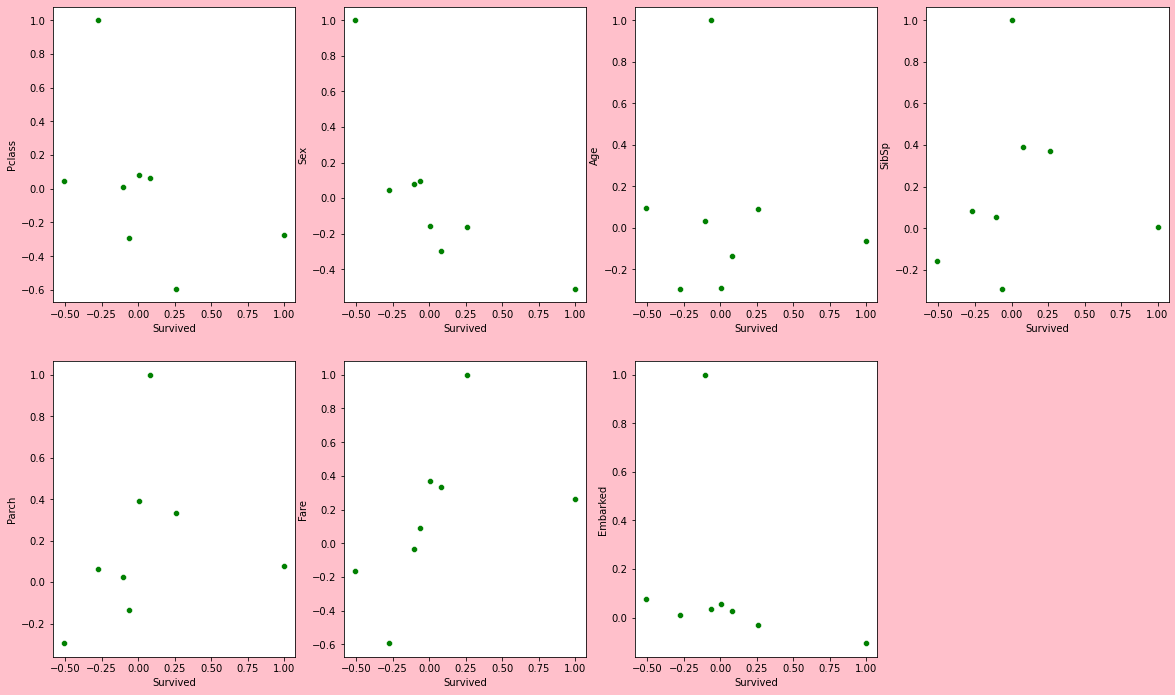

In [54]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber = 1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(Y,X[column],color='green')
       
    plotnumber+=1
plt.show()

In [64]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scale, i) for i in range(X_scale.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,15.036259,Pclass
1,1.714529,Sex
2,2.651834,Age
3,3.986602,SibSp
4,2.980116,Parch
5,18.329759,Fare
6,1.237998,Embarked


In [45]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (540, 7)
Training target vector size: (540,)
Test feature matrix size: (181, 7)
Test target vector size: (181,)


In [47]:
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8525345622119815 on Random_state 244


In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=244, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8397790055248618


Confusion matrix of Logistics Regression : 
 [[107   9]
 [ 20  45]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       116
           1       0.83      0.69      0.76        65

    accuracy                           0.84       181
   macro avg       0.84      0.81      0.82       181
weighted avg       0.84      0.84      0.84       181



In [51]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.75862069 0.77083333 0.77083333 0.75694444 0.81944444]
Mean CV Score : 0.7753352490421456
Std deviation : 0.022819964059516664


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [54]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8011049723756906


Confusion matrix of Decision Tree Classifier : 
 [[100  16]
 [ 20  45]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       116
           1       0.74      0.69      0.71        65

    accuracy                           0.80       181
   macro avg       0.79      0.78      0.78       181
weighted avg       0.80      0.80      0.80       181



In [55]:
CVscore = cross_val_score(dtc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.75172414 0.72916667 0.79861111 0.77083333 0.75      ]
Mean CV Score : 0.7600670498084291
Std deviation : 0.023355260098704193


In [56]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8287292817679558


Confusion matrix of Random Forest Classifier : 
 [[105  11]
 [ 20  45]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       116
           1       0.80      0.69      0.74        65

    accuracy                           0.83       181
   macro avg       0.82      0.80      0.81       181
weighted avg       0.83      0.83      0.83       181



In [57]:

CVscore = cross_val_score(rfc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.77931034 0.77777778 0.82638889 0.78472222 0.84722222]
Mean CV Score : 0.8030842911877395
Std deviation : 0.028404390340986366


In [58]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.8011049723756906


Confusion matrix of AdaBoost Classifier : 
 [[104  12]
 [ 24  41]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       116
           1       0.77      0.63      0.69        65

    accuracy                           0.80       181
   macro avg       0.79      0.76      0.77       181
weighted avg       0.80      0.80      0.80       181



In [59]:
CVscore = cross_val_score(adbc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.7862069  0.79166667 0.83333333 0.84027778 0.80555556]
Mean CV Score : 0.8114080459770114
Std deviation : 0.021786469532575813
